In [ ]:
!conda install -c intel scikit-learn

In [ ]:
pip install --upgrade scikit-learn

# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
stop_words = set(stopwords.words('spanish'))

In [3]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [4]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/1I3qXro6Hy4UiTmC68axmuC3Qqrj_9YEKSzFILizyl3A/edit?usp=sharing
tweets_df = pd.read_csv('./data/medellin_tweets_labeled.csv', sep = ',')

In [5]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [6]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    5253
0.0     550
1.0     233
Name: sentiment, dtype: int64

In [7]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.870278
0.0    0.091120
1.0    0.038602
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [8]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [9]:
tweets_labeled_df.shape

(783, 2)

In [10]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [11]:
tweets_nolabeled_df.shape

(5253, 2)

### Splitting train and test datasets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [13]:
X_train.shape

(626,)

In [14]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.702875
1.0    0.297125
Name: sentiment, dtype: float64

In [15]:
X_test.shape

(157,)

In [16]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.700637
1.0    0.299363
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [17]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [18]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [19]:
X_bow = bow.fit_transform(X_train)

In [20]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [21]:
logistic_model = LogisticRegression(random_state = 2)

In [22]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [23]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

In [24]:
datos = pd.DataFrame(X_test)
datos['y'] = y_test
datos['Predictions'] = y_test_bow_predict
datos

,full_text,y,Predictions
50,@natiibedoya: A @petrogustavo lo sacaron como ...,0.0,0.0
52,@andresportillo_: En Medellín abuchearon a @pe...,0.0,0.0
282,¿Alguien quiere hablar de la sacada a las pata...,0.0,1.0
769,@JoseMejiaCD Petro llenando plazas en Medellín...,0.0,0.0
351,@chuchoagudelo1: #PetroNuncaSeraPresidente\nQu...,0.0,0.0
...,...,...,...
651,@PilsenCerveza: Parceros cuando cumple Medellí...,1.0,0.0
847,@elkin_isaza Y luego estos hdpta lo presentará...,0.0,0.0
531,@IsabelHdz05: Necesitamos a @MariaFdaCabal y a...,0.0,1.0
884,Lamentable lo que hicieron en Medellín con Pet...,0.0,0.0


In [25]:
datos.loc[datos['y'] != datos['Predictions']]

,full_text,y,Predictions
282,¿Alguien quiere hablar de la sacada a las pata...,0.0,1.0
3178,"Que triste es tener un familiar enfermo, no sa...",0.0,1.0
848,"@petrogustavo Medallo dando ejemplo, ya lo vie...",1.0,0.0
3031,@DefensoriaDIAN: Esta semana desde Cartagena y...,1.0,0.0
102,Una pequeña muestra del paso de los Artistas C...,1.0,0.0
774,@Caliquistan: Se escandalizan por el robo en M...,1.0,0.0
975,@yoleidadiaz9: @isamg6 @petrogustavo Que bueno...,1.0,0.0
358,La peli de ayer en Medellín fue por aquí ::: ...,1.0,0.0
108,@FisicoImpuro: Petro estará hoy en Medellín de...,1.0,0.0
206,"Que es esa bellezaaa, Medellín la mejor, la qu...",0.0,1.0


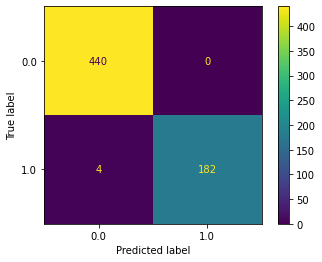

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

In [73]:
print('Precision:', precision_score(y_train, y_train_bow_predict))
print('Recall:', recall_score(y_train, y_train_bow_predict))
print('F1:', f1_score(y_train, y_train_bow_predict))

Precision: 1.0
Recall: 0.978494623655914
F1: 0.9891304347826088


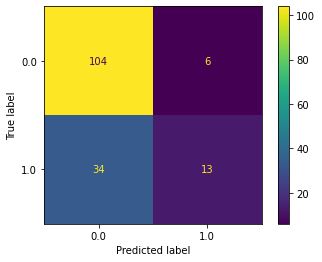

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [28]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.6842105263157895
Recall: 0.2765957446808511
F1: 0.393939393939394


### Training and evaluating a model using TF-IDF

In [29]:
logistic_model = LogisticRegression(random_state = 2)

In [30]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=2)

In [38]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(tfidf.transform(X_test))

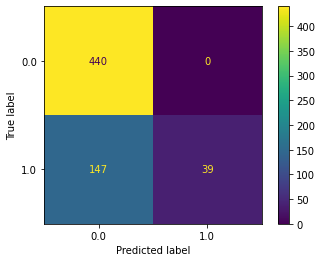

In [39]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

In [72]:
print('Precision:', precision_score(y_train, y_train_tfidf_predict))
print('Recall:', recall_score(y_train, y_train_tfidf_predict))
print('F1:', f1_score(y_train, y_train_tfidf_predict))

Precision: 1.0
Recall: 0.20967741935483872
F1: 0.3466666666666667


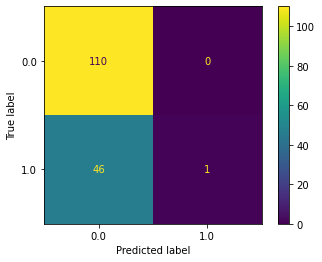

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [41]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 1.0
Recall: 0.02127659574468085
F1: 0.04166666666666667


### Decision Trees

### BOW

In [43]:
dfbow = tree.DecisionTreeClassifier()
dfbow = dfbow.fit(X_bow, y_train)

y_train_dt = dfbow.predict(X_bow)
y_test_dt = dfbow.predict(bow.transform(X_test))

#ConfusionMatrixDisplay.from_predictions(y_train, y_train_dt)

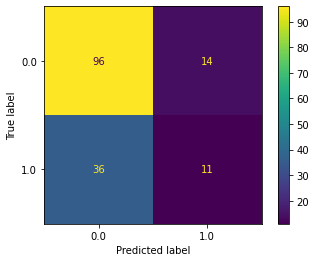

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_dt)

In [48]:
print('Precision:', precision_score(y_test, y_test_dt))
print('Recall:', recall_score(y_test, y_test_dt))
print('F1:', f1_score(y_test, y_test_dt))

Precision: 0.44
Recall: 0.23404255319148937
F1: 0.3055555555555556


### TFIDF

In [49]:
dt_modeltfidf = tree.DecisionTreeClassifier()
dt_modeltfidf = dt_modeltfidf.fit(X_tfidf, y_train)

y_train_tfidf_dt = dt_modeltfidf.predict(X_tfidf)
y_test_tfidf_dt = dt_modeltfidf.predict(tfidf.transform(X_test))

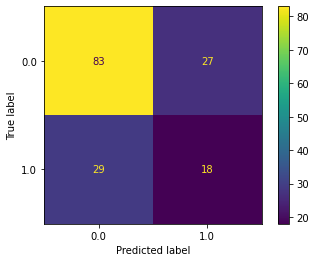

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_dt)

In [52]:
print('Precision:', precision_score(y_test, y_test_tfidf_dt))
print('Recall:', recall_score(y_test, y_test_tfidf_dt))
print('F1:', f1_score(y_test, y_test_tfidf_dt))

Precision: 0.4
Recall: 0.3829787234042553
F1: 0.3913043478260869


### Random Forest

### BOW

In [67]:
#bow_rf = RandomForestClassifier(max_depth=2, random_state=0)
bow_rf = RandomForestClassifier(n_estimators=10)
bow_rf  = bow_rf.fit(X_bow, y_train)

y_train_rf = bow_rf.predict(X_bow)
y_test_rf = bow_rf.predict(bow.transform(X_test))

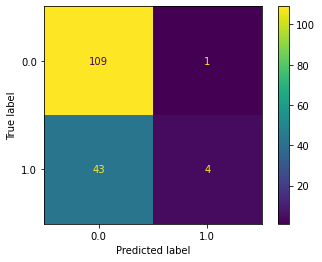

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf)

In [69]:
print('Precision:', precision_score(y_test, y_test_rf))
print('Recall:', recall_score(y_test, y_test_rf))
print('F1:', f1_score(y_test, y_test_rf))

Precision: 0.8
Recall: 0.0851063829787234
F1: 0.15384615384615383


### TFIDF

In [56]:
tfidf_rf = RandomForestClassifier(n_estimators=10)
tfidf_rf = tfidf_rf.fit(X_tfidf, y_train)

y_train_tfidf_rf = tfidf_rf.predict(X_tfidf)
y_test_tfidf_rf = tfidf_rf.predict(tfidf.transform(X_test))

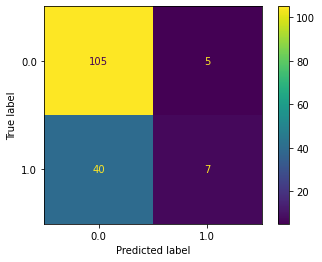

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_rf)

In [58]:
print('Precision:', precision_score(y_test, y_test_tfidf_rf))
print('Recall:', recall_score(y_test, y_test_tfidf_rf))
print('F1:', f1_score(y_test, y_test_tfidf_rf))

Precision: 0.5833333333333334
Recall: 0.14893617021276595
F1: 0.23728813559322032


### Support Vector Machines

### BOW

In [59]:
bow_svm = SVC()
bow_svm.fit(X_bow, y_train)

y_train_svm = bow_svm.predict(X_bow)
y_test_svm = bow_svm.predict(bow.transform(X_test))

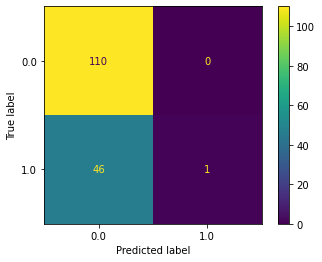

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm)

In [61]:
print('Precision:', precision_score(y_test, y_test_svm))
print('Recall:', recall_score(y_test, y_test_svm))
print('F1:', f1_score(y_test, y_test_svm))

Precision: 1.0
Recall: 0.02127659574468085
F1: 0.04166666666666667


### TFIDF

In [62]:
tfidf_svm = SVC()
tfidf_svm.fit(X_tfidf, y_train)

y_train_tfidf_svm = tfidf_svm.predict(X_tfidf)
y_test_tfidf_svm = tfidf_svm.predict(tfidf.transform(X_test))

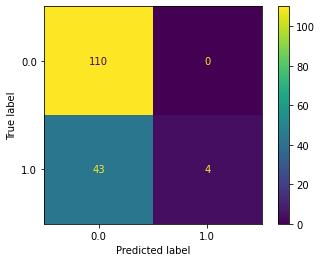

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_svm)

In [71]:
print('Precision:', precision_score(y_test, y_test_tfidf_svm))
print('Recall:', recall_score(y_test, y_test_tfidf_svm))
print('F1:', f1_score(y_test, y_test_tfidf_svm))

Precision: 1.0
Recall: 0.0851063829787234
F1: 0.1568627450980392


### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

# Workshop 3
### Deadline: November 21th, 2021

Analyze how you can improve the current models. Evaluate these alternatives:
- It is needed more training data
- There is some mislabeled data
- Logistic regression-based models are inadequate to represent this scenario. Try with different algorithms: [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [K-Nearest Neighborhoods](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), [Naive-Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [Neural Networks](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).
- Previous results can be improved? Which model is better and why?